## iPyLeaflet
[ipyleaflet](https://github.com/ellisonbg/ipyleaflet) is a bridge between jupyter notebooks and the [leaflet](http://leafletjs.com/)  javascript library for drawing maps.

ipyleaflet comes with a few examples notebooks (this notebook was derived from one) but very little documentation,
for more documentation read the [Leaflet IPA](http://leafletjs.com/reference.html)

For installation directions, see the README on [ipyleaflet](https://github.com/ellisonbg/ipyleaflet)

[GeoJson](https://tools.ietf.org/html/rfc7946#section-3.1.7) is a good way to add data on top of an ipyleaflet map.

For other backgrounds than open streets, you can alter the ipyleaflet.py file to point to one of [these map providers](https://leaflet-extras.github.io/leaflet-providers/preview/)

In [1]:
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

## Visualizing the distribution of the observations

## Load the required libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
import pylab as plt

import sys
sys.path.append('./lib')

from leaflet import *

In [3]:
data_dir = "../../Data/Weather/"
from pickle import load
with open(data_dir+'/PRCP_residuals_PCA.pickle','rb') as file:
    Res_eig=load(file)
print Res_eig.keys()

#stations.pkl
with open(data_dir+'stations.pkl','rb') as file:
    Stations=load(file)
Stations.head()


['eigen-vecs', 'stations']


,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930.0
AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390.0


In [4]:
import pandas as pd
Eig=pd.DataFrame(Res_eig['eigen-vecs'].transpose())
Eig.head()

,0,1,2,3
0,-0.131004,-0.060758,0.052466,0.026608
1,-0.137083,-0.055645,0.058154,0.002868
2,-0.121510,-0.055192,0.051607,0.080014
3,-0.093918,-0.044525,0.036549,0.020051
4,-0.134038,-0.064243,0.061143,0.016217


In [5]:
Eig['station']=Res_eig['stations']
Eig=Eig.set_index('station')
print Res_eig['stations'][:5]
Eig.head()

[u'USC00043714', u'USC00040673', u'USC00040672', u'USC00040855', u'USC00040677']


,0,1,2,3
station,,,,
USC00043714,-0.131004,-0.060758,0.052466,0.026608
USC00040673,-0.137083,-0.055645,0.058154,0.002868
USC00040672,-0.121510,-0.055192,0.051607,0.080014
USC00040855,-0.093918,-0.044525,0.036549,0.020051
USC00040677,-0.134038,-0.064243,0.061143,0.016217


In [6]:
table=Eig.join(Stations,how='left')

In [7]:
table=table[['name','latitude','longitude','elevation',0,1,2,3]]
table.head(4)

,name,latitude,longitude,elevation,0,1,2,3
station,,,,,,,,
USC00043714,HALF MOON BAY,37.4725,-122.4433,8.2,-0.131004,-0.060758,0.052466,0.026608
USC00040673,BEN LOMOND #4,37.0856,-122.0797,128.0,-0.137083,-0.055645,0.058154,0.002868
USC00040672,BEN LOMOND SPRR,37.0833,-122.0833,91.4,-0.121510,-0.055192,0.051607,0.080014
USC00040855,BLACK MTN LOS ALTOS,37.3167,-122.1500,798.9,-0.093918,-0.044525,0.036549,0.020051


In [8]:
import pylab as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

## Map

In [9]:
box = (table['latitude'].min(), table['latitude'].max(), table['longitude'].min(), table['longitude'].max())
print box
min_lat,max_lat,min_long,max_long = box
center = [(min_lat+max_lat)/2, (min_long+max_long)/2]
zoom = 9
m = Map(default_tiles=TileLayer(opacity=0.6), center=center, zoom=zoom)
r = Rectangle(bounds=[[min_lat,min_long],[max_lat,max_long]], weight=5, fill_opacity=0.0)
m += r

lat_margin=(max_lat-min_lat)/4
long_margin=(max_long-min_long)/4
for index,row in table.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    for col in range(4):
        _coef=row[col]
        if np.isnan(_coef):
            continue
        r=abs(_coef)/5
        #print r
        color=colors[col]
        signs=[[+1,+1],[+1,-1],[-1,-1],[-1,+1]]
        lat_sign,long_sign=signs[col]
        triangle=[(_lat,_long),(_lat+lat_sign*r,_long),(_lat,_long+long_sign*r),(_lat,_long)]
        if _coef<0:
            poly= Polygon(locations=triangle, weight=0,
                    color=color, opacity=0, fill_opacity=0.7,
                    fill_color=color)
        else:
            poly= Polygon(locations=triangle, weight=2,
                    color=color, opacity=0.8, fill_opacity=0,
                    fill_color=color)
        m +=poly   
m    

(36.187199999999997, 37.476700000000001, -122.44329999999999, -120.86669999999999)


Widget Javascript not detected.  It may not be installed or enabled properly.


### excercises:
* Add a legend that relates the colors to values.
* Leaflet supports a variety of maps. See if you can get a topographical map as the background.

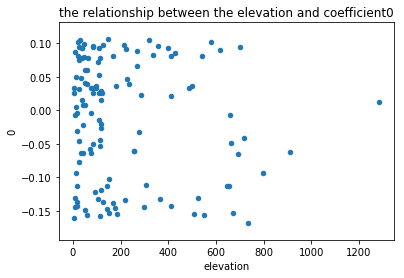

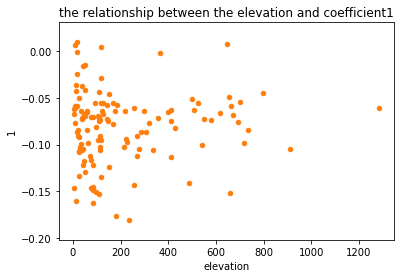

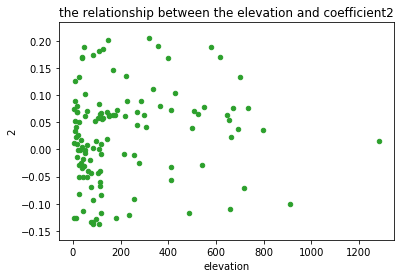

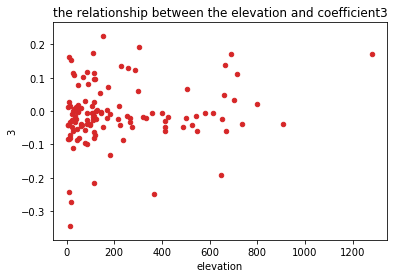

In [15]:
%matplotlib inline
# from pyspark import SparkContext
# from pyspark.sql import *
# #sc.stop()
# sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/computeStats.py'])
# sqlContext = SQLContext(sc)
# feature='coeff_1'
# sqlContext.registerDataFrameAsTable(df,'weather')
# df1 = sqlContext.sql(Query)
# df1.show(4)
# df2=df1.groupby(['station','latitude','longitude','elevation']).agg({"station": "count", feature: "mean"})
# pdf=table.toPandas()
# #pdf.plot.scatter(x='elevation',y='avg(coeff_1)');
colors = prop_cycle.by_key()['color']
table.plot.scatter(x='elevation', y=0, color = colors[0], 
                   title = 'the relationship between the elevation and coefficient0')
table.plot.scatter(x='elevation', y=1, color = colors[1],
                   title = 'the relationship between the elevation and coefficient1')
table.plot.scatter(x='elevation', y=2, color = colors[2],
                   title = 'the relationship between the elevation and coefficient2')
table.plot.scatter(x='elevation', y=3, color = colors[3],
                   title = 'the relationship between the elevation and coefficient3')
# table.plot.